In [6]:
#import all the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [7]:
#Loading Train data
# Train Data
train = pd.read_csv('Train-1542865627584.csv')

# Train Beneficiary Data
train_bene = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')

# Train Inpatient Claims
train_inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')

# Train Outpatient Claims
train_outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')


In [8]:
#Loading Test data
# Test Data (no labels)
test = pd.read_csv('Test-1542969243754.csv')

# Test Beneficiary Data
test_bene = pd.read_csv('Test_Beneficiarydata-1542969243754.csv')

# Test Inpatient Claims
test_inpatient = pd.read_csv('Test_Inpatientdata-1542969243754.csv')

# Test Outpatient Claims
test_outpatient = pd.read_csv('Test_Outpatientdata-1542969243754.csv')


# EDA


In [9]:
## 1. Dataset Shape

print("Train:", train.shape)
print("Train Beneficiary:", train_bene.shape)
print("Train Inpatient:", train_inpatient.shape)
print("Train Outpatient:", train_outpatient.shape)


Train: (5410, 2)
Train Beneficiary: (138556, 25)
Train Inpatient: (40474, 30)
Train Outpatient: (517737, 27)


In [10]:
## 2. cols and data type
print("\nTrain columns and types:")
print(train.dtypes)

print("\nTrain Beneficiary columns and types:")
print(train_bene.dtypes)

print("\nTrain Inpatient columns and types:")
print(train_inpatient.dtypes)

print("\nTrain Outpatient columns and types:")
print(train_outpatient.dtypes)




Train columns and types:
Provider          object
PotentialFraud    object
dtype: object

Train Beneficiary columns and types:
BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke              

In [11]:
## 3. function to show the columns with missing values
def missing_values(df, name):
    miss = df.isnull().sum()
    miss = miss[miss > 0].sort_values(ascending=False)
    print(f"\nMissing values in {name}:")
    print(miss)

missing_values(train, 'Train')
missing_values(train_bene, 'Train Beneficiary')
missing_values(train_inpatient, 'Train Inpatient')
missing_values(train_outpatient, 'Train Outpatient')



Missing values in Train:
Series([], dtype: int64)

Missing values in Train Beneficiary:
DOD    137135
dtype: int64

Missing values in Train Inpatient:
ClmProcedureCode_6     40474
ClmProcedureCode_5     40465
ClmProcedureCode_4     40358
ClmProcedureCode_3     39509
ClmDiagnosisCode_10    36547
OtherPhysician         35784
ClmProcedureCode_2     35020
ClmProcedureCode_1     17326
OperatingPhysician     16644
ClmDiagnosisCode_9     13497
ClmDiagnosisCode_8      9942
ClmDiagnosisCode_7      7258
ClmDiagnosisCode_6      4838
ClmDiagnosisCode_5      2894
ClmDiagnosisCode_4      1534
DeductibleAmtPaid        899
ClmDiagnosisCode_3       676
ClmDiagnosisCode_2       226
AttendingPhysician       112
dtype: int64

Missing values in Train Outpatient:
ClmProcedureCode_6       517737
ClmProcedureCode_5       517737
ClmProcedureCode_4       517735
ClmProcedureCode_3       517733
ClmProcedureCode_2       517701
ClmProcedureCode_1       517575
ClmDiagnosisCode_10      516654
ClmDiagnosisCode_9     

In [12]:
## 4. Target variable analysis to understand class imbalance
print("\nFraud distribution in train:")
print(train['PotentialFraud'].value_counts())

#normalize=True converts 0-1 and *100 converts to percentage
print("\nFraud distribution in percentages:")
print(train['PotentialFraud'].value_counts(normalize=True)*100)



Fraud distribution in train:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

Fraud distribution in percentages:
PotentialFraud
No     90.64695
Yes     9.35305
Name: proportion, dtype: float64


In [13]:
## 5. numeric cols
print("\nTrain numeric stats:")
print(train.describe())

print("\nTrain Beneficiary numeric stats:")
print(train_bene.describe())

print("\nTrain Inpatient numeric stats:")
print(train_inpatient.describe())

print("\nTrain Outpatient numeric stats:")
print(train_outpatient.describe())



Train numeric stats:
        Provider PotentialFraud
count       5410           5410
unique      5410              2
top     PRV57763             No
freq           1           4904

Train Beneficiary numeric stats:
              Gender           Race          State         County  \
count  138556.000000  138556.000000  138556.000000  138556.000000   
mean        1.570932       1.254511      25.666734     374.424745   
std         0.494945       0.717007      15.223443     266.277581   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000       1.000000      11.000000     141.000000   
50%         2.000000       1.000000      25.000000     340.000000   
75%         2.000000       1.000000      39.000000     570.000000   
max         2.000000       5.000000      54.000000     999.000000   

       NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
count        138556.000000        138556.000000          138556.000000   
mean          

In [14]:
## 6. categorical vars analysis
print("\nTrain numeric stats:")
print(train.describe())

print("\nTrain Beneficiary numeric stats:")
print(train_bene.describe())

print("\nTrain Inpatient numeric stats:")
print(train_inpatient.describe())

print("\nTrain Outpatient numeric stats:")
print(train_outpatient.describe())



Train numeric stats:
        Provider PotentialFraud
count       5410           5410
unique      5410              2
top     PRV57763             No
freq           1           4904

Train Beneficiary numeric stats:
              Gender           Race          State         County  \
count  138556.000000  138556.000000  138556.000000  138556.000000   
mean        1.570932       1.254511      25.666734     374.424745   
std         0.494945       0.717007      15.223443     266.277581   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000       1.000000      11.000000     141.000000   
50%         2.000000       1.000000      25.000000     340.000000   
75%         2.000000       1.000000      39.000000     570.000000   
max         2.000000       5.000000      54.000000     999.000000   

       NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
count        138556.000000        138556.000000          138556.000000   
mean          

# Merging

In [15]:
# 1. Adding column to distinguish inpatient vs outpatient

train_inpatient['ClaimType'] = 'Inpatient'
train_outpatient['ClaimType'] = 'Outpatient'


In [16]:
#checking columns before merging
#Get column sets
cols_inpatient = set(train_inpatient.columns)
cols_outpatient = set(train_outpatient.columns)

# Common columns (intersection)
common_cols = cols_inpatient & cols_outpatient
print(f"Common columns ({len(common_cols)}):", common_cols)

# Columns only in inpatient
only_inpatient = cols_inpatient - cols_outpatient
print(f"Only in inpatient ({len(only_inpatient)}):", only_inpatient)

# Columns only in outpatient
only_outpatient = cols_outpatient - cols_inpatient
print(f"Only in outpatient ({len(only_outpatient)}):", only_outpatient)

# All unique columns
all_cols = cols_inpatient | cols_outpatient
print(f"Total unique columns: {len(all_cols)}")

Common columns (28): {'ClmDiagnosisCode_7', 'DeductibleAmtPaid', 'ClmProcedureCode_4', 'ClaimEndDt', 'ClmDiagnosisCode_5', 'ClmProcedureCode_6', 'Provider', 'OperatingPhysician', 'BeneID', 'ClmDiagnosisCode_4', 'InscClaimAmtReimbursed', 'ClmDiagnosisCode_8', 'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_10', 'OtherPhysician', 'ClmProcedureCode_5', 'AttendingPhysician', 'ClmDiagnosisCode_2', 'ClaimID', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_1', 'ClaimStartDt', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmDiagnosisCode_3', 'ClmProcedureCode_3', 'ClaimType', 'ClmDiagnosisCode_6'}
Only in inpatient (3): {'DischargeDt', 'DiagnosisGroupCode', 'AdmissionDt'}
Only in outpatient (0): set()
Total unique columns: 31


In [17]:
# 2. concatenate inpatient and outpatient claims

claims = pd.concat([train_inpatient, train_outpatient], axis=0, ignore_index=True)
print("Combined claims shape:", claims.shape)


Combined claims shape: (558211, 31)


In [18]:
# 3. Merge with beneficiary data, uses BeneID as join key

claims = claims.merge(train_bene, on='BeneID', how='left')
print("Claims + Beneficiary shape:", claims.shape)


Claims + Beneficiary shape: (558211, 55)


In [19]:
# 4. claims+beneficiary+provider fraud label

# Merge now based on Provider
claims = claims.merge(train, on='Provider', how='left')
print("Final merged dataset shape:", claims.shape)


Final merged dataset shape: (558211, 56)


In [20]:
# 5. Sanity
print(claims[['Provider', 'PotentialFraud']].drop_duplicates().head())
print(claims.columns)
claims.head()


   Provider PotentialFraud
0  PRV55912            Yes
1  PRV55907             No
2  PRV56046             No
3  PRV52405             No
4  PRV56614             No
Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'ClaimType', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzh

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No


# EDA on merged data


In [21]:
# 7. visualizing key features

import matplotlib.pyplot as plt
import seaborn as sns

# check columns in claims
print("Claims DataFrame columns:")
print(claims.columns)

Claims DataFrame columns:
Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'ClaimType', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
     

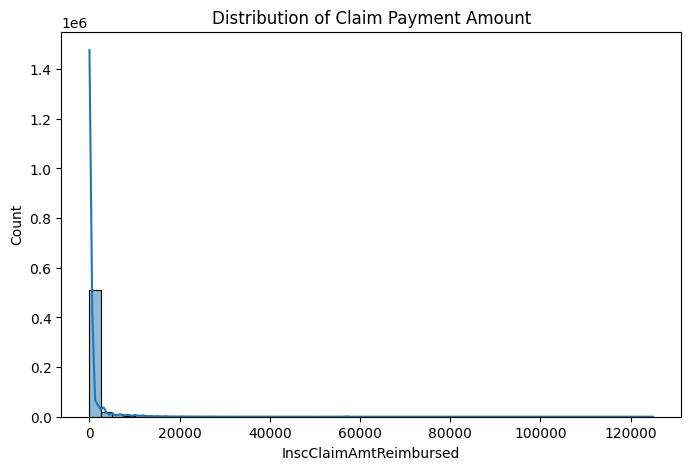

In [22]:
# Example: Distribution of claim amounts
#Shows the distribution of claim reimbursement amounts, revealing how frequently different payment values occur and whether high-value claims are common or rare.

plt.figure(figsize=(8,5))
sns.histplot(claims['InscClaimAmtReimbursed'], bins=50, kde=True)
plt.title('Distribution of Claim Payment Amount')
plt.show()

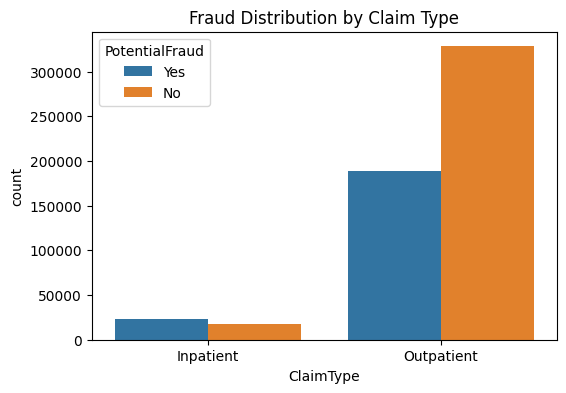

In [23]:
# Count of claims by ClaimType (Inpatient vs Outpatient)

plt.figure(figsize=(6,4))
sns.countplot(data=claims, x='ClaimType', hue='PotentialFraud')
plt.title('Fraud Distribution by Claim Type')
plt.show()

<ipython-input-24-f47e31a4e5ac>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette="viridis")


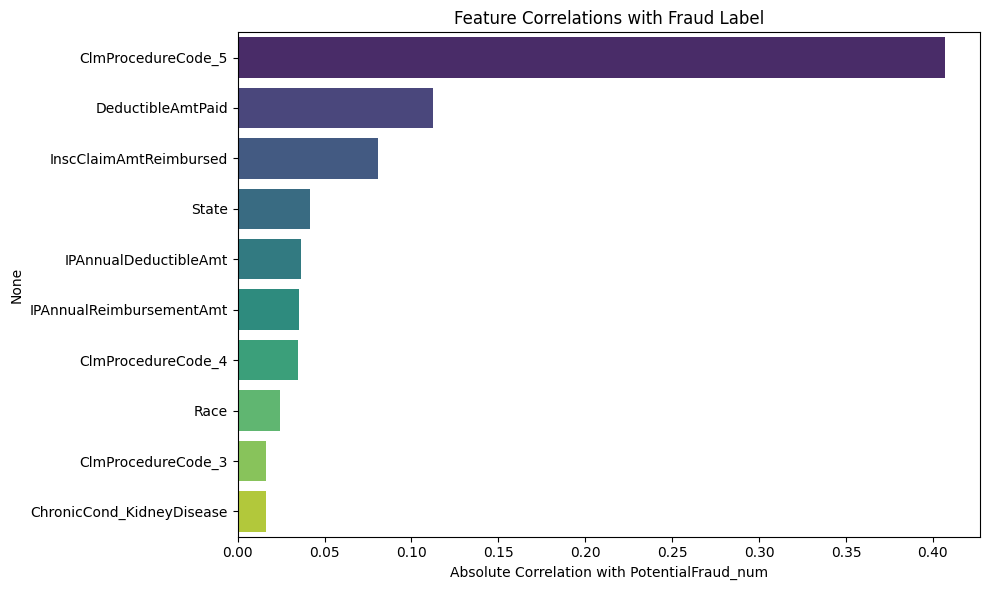

In [24]:
#correlation matrix

claims['PotentialFraud_num'] = claims['PotentialFraud'].map({'No': 0, 'Yes': 1})

#include only numeric cols
numeric_cols = claims.select_dtypes(include=['float64', 'int64']).columns.drop('PotentialFraud_num')

#checking correlation with potential fraud
correlations = claims[numeric_cols].corrwith(claims['PotentialFraud_num']).abs()

# top 10 most correlated
correlations_sorted = correlations.sort_values(ascending=False).head(10)

#plot
plt.figure(figsize=(10,6))
sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette="viridis")
plt.xlabel('Absolute Correlation with PotentialFraud_num')
plt.title('Feature Correlations with Fraud Label')
plt.tight_layout()
plt.show()


In [25]:
# exploring provider

provider_summary = claims.groupby('Provider').agg({
    'ClaimID': 'count',  # number of claims by the provider
    'InscClaimAmtReimbursed': 'mean',  # Average amount paid
}).rename(columns={'ClaimID': 'TotalClaims', 'InscClaimAmtReimbursed': 'AvgPayment'})

provider_summary.head(5)



,TotalClaims,AvgPayment
Provider,,
PRV51001,25,4185.600000
PRV51003,132,4588.409091
PRV51004,149,350.134228
PRV51005,1165,241.124464
PRV51007,72,468.194444


In [26]:
#merge proivder summary with train data for potential fraud col

merged_data_for_plot = provider_summary.reset_index().merge(train, on='Provider', how='left')

# Plot Top 10 providers by claim counts
top_providers = merged_data_for_plot.sort_values(by='TotalClaims', ascending=False).head(10)

print(top_providers)



      Provider  TotalClaims  AvgPayment PotentialFraud
363   PRV51459         8240  281.782767            Yes
2250  PRV53797         4739  275.079131            Yes
455   PRV51574         4444  288.436094            Yes
2335  PRV53918         3588  282.750836            Yes
3113  PRV54895         3436  307.802678            Yes
3363  PRV55215         3393  673.315650            Yes
853   PRV52064         2844  393.699015            Yes
4004  PRV56011         2833  261.786092            Yes
3195  PRV55004         2399  293.293039            Yes
5032  PRV57306         2315  271.904968            Yes


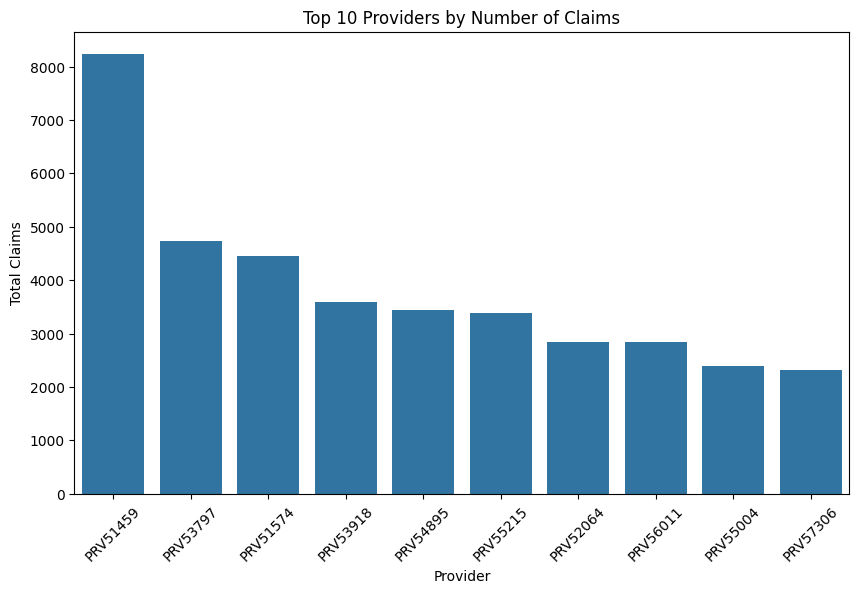

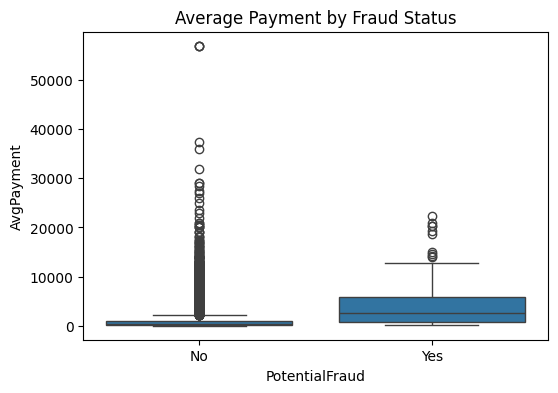

In [27]:
#plot number of claims by top 10 providers
plt.figure(figsize=(10,6))
sns.barplot(x=top_providers['Provider'], y=top_providers['TotalClaims'])
plt.title('Top 10 Providers by Number of Claims')
plt.xlabel('Provider')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)
plt.show()

# Boxplot of Average Payment by Fraud Status
plt.figure(figsize=(6,4))
sns.boxplot(data=merged_data_for_plot,
            x='PotentialFraud',
            y='AvgPayment')
plt.title('Average Payment by Fraud Status')
plt.show()


# Feature Engineering


In [28]:
#Feature engineering

provider_features = claims.groupby('Provider').agg(
    TotalClaims=('ClaimID', 'count'),
    AvgClaimAmount=('InscClaimAmtReimbursed', 'mean'),
    InpatientClaims=('ClaimType', lambda x: (x == 'Inpatient').sum()),
    OutpatientClaims=('ClaimType', lambda x: (x == 'Outpatient').sum()),

    # Average age: Calculate from DOB assuming 'DOB' is datetime or string
    AvgAge=('DOB', lambda x: (pd.Timestamp('today') - pd.to_datetime(x)).dt.days.mean() / 365.25),

    # Gender distribution - percentage of male (assuming 'M' and 'F')
    MalePerc=('Gender', lambda x: (x == 'M').mean()),

    # Chronic conditions - sum across all claims for each condition (0/1)
    ChronicAlzheimer=('ChronicCond_Alzheimer', 'sum'),
    ChronicHeartFailure=('ChronicCond_Heartfailure', 'sum'),
    ChronicKidneyDisease=('ChronicCond_KidneyDisease', 'sum'),
    ChronicCancer=('ChronicCond_Cancer', 'sum'),
    ChronicObstrPulmonary=('ChronicCond_ObstrPulmonary', 'sum'),
    ChronicDepression=('ChronicCond_Depression', 'sum'),
    ChronicDiabetes=('ChronicCond_Diabetes', 'sum'),
    ChronicIschemicHeart=('ChronicCond_IschemicHeart', 'sum'),
    ChronicOsteoporosis=('ChronicCond_Osteoporasis', 'sum'),
    ChronicRheumatoid=('ChronicCond_rheumatoidarthritis', 'sum'),
    ChronicStroke=('ChronicCond_stroke', 'sum'),

    # Average annual reimbursements and deductibles
    AvgIPAnnualReimbursement=('IPAnnualReimbursementAmt', 'mean'),
    AvgIPAnnualDeductible=('IPAnnualDeductibleAmt', 'mean'),
    AvgOPAnnualReimbursement=('OPAnnualReimbursementAmt', 'mean'),
    AvgOPAnnualDeductible=('OPAnnualDeductibleAmt', 'mean'),

    # State mode (most common state for the provider)
    State=('State', lambda x: x.mode()[0] if not x.mode().empty else np.nan),

    # Potential Fraud label (assuming consistent per provider)
    PotentialFraud=('PotentialFraud', 'first')
).reset_index()

# Calculate claim type ratios
provider_features['InpatientClaimRatio'] = provider_features['InpatientClaims'] / provider_features['TotalClaims']
provider_features['OutpatientClaimRatio'] = provider_features['OutpatientClaims'] / provider_features['TotalClaims']

# Handle any missing values if needed
provider_features.fillna(0, inplace=True)

print(provider_features.head())


   Provider  TotalClaims  AvgClaimAmount  InpatientClaims  OutpatientClaims  \
0  PRV51001           25     4185.600000                5                20   
1  PRV51003          132     4588.409091               62                70   
2  PRV51004          149      350.134228                0               149   
3  PRV51005         1165      241.124464                0              1165   
4  PRV51007           72      468.194444                3                69   

      AvgAge  MalePerc  ChronicAlzheimer  ChronicHeartFailure  \
0  94.255989       0.0                35                   31   
1  85.500840       0.0               208                  184   
2  87.682795       0.0               234                  210   
3  85.962997       0.0              1904                 1650   
4  84.737433       0.0               118                  104   

   ChronicKidneyDisease  ...  ChronicRheumatoid  ChronicStroke  \
0                    33  ...                 42             44   
1 

# Model Training

In [29]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = provider_features.drop(columns=['Provider', 'PotentialFraud'])
y = provider_features['PotentialFraud']

# Split 80-20 train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [30]:
#using SMOTE as there is class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Model Evaluation

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

# Predict
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

# Evaluate
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

          No       0.98      0.91      0.95       981
         Yes       0.49      0.81      0.61       101

    accuracy                           0.90      1082
   macro avg       0.74      0.86      0.78      1082
weighted avg       0.93      0.90      0.91      1082

ROC-AUC: 0.9415881955167994


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15],
    'min_samples_split': [2, 4],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

print("Best Params:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Params: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 150}


              precision    recall  f1-score   support

          No       0.98      0.90      0.94       981
         Yes       0.46      0.80      0.59       101

    accuracy                           0.89      1082
   macro avg       0.72      0.85      0.76      1082
weighted avg       0.93      0.89      0.91      1082

ROC-AUC: 0.9429103460804796


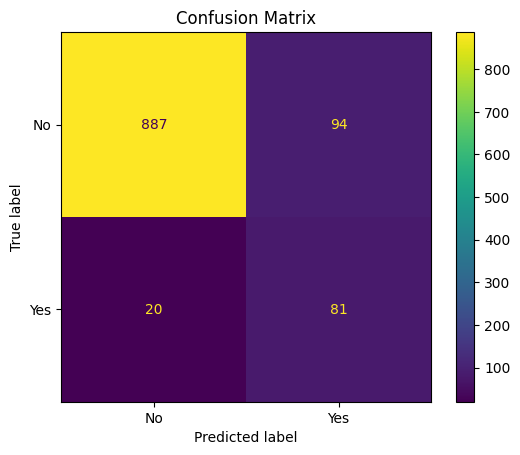

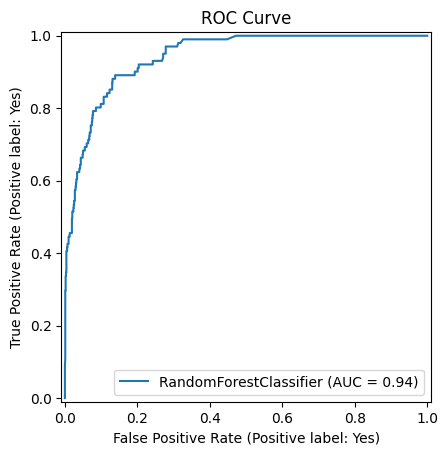

In [33]:
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Predict with best model
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion Matrix plot
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve plot
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


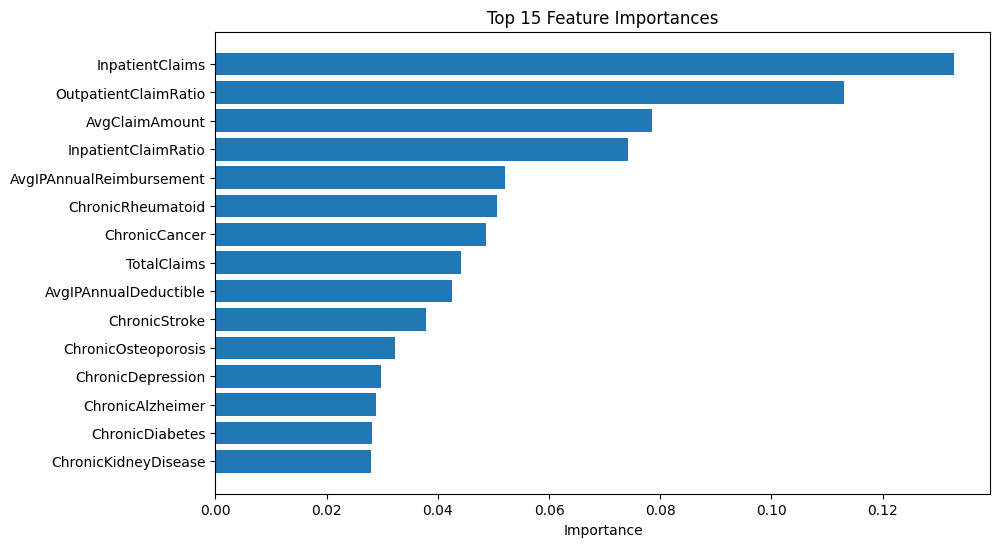

In [34]:
# Get feature importances from the tuned model
importances = best_model.feature_importances_
features = X.columns

# Create a DataFrame for easy sorting and plotting
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 15 important features
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'][:15][::-1], feat_imp_df['Importance'][:15][::-1])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances')
plt.show()


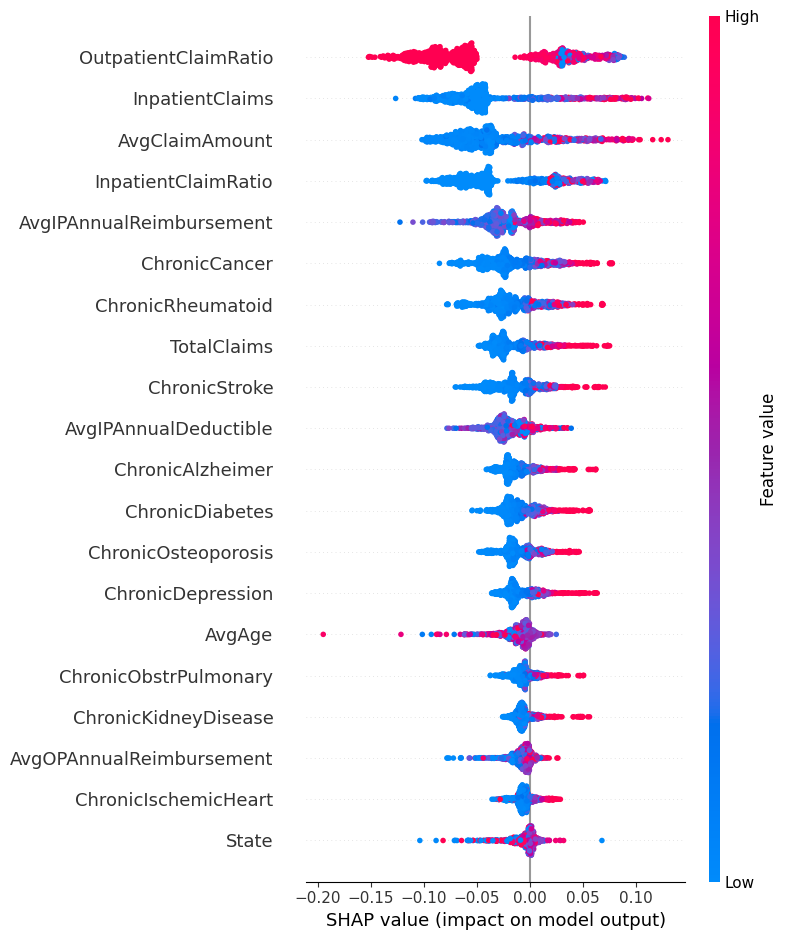

In [35]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(best_model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[:, :, 1], X_test)

plt.show()

In [36]:
%notebook -e healthcare_fraud.py
